**Importing Libraries**

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import os
import shutil

**Loading the Datasets and saving in the dataset folder**

In [4]:
# Source folder: where original class folders and images are present
source_folder = r"C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project5/DataSet"

# Destination folder: to copy the dataset
destination_folder = r"C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project5/Project5_Code/Defect_Detection_on_Solar_Panel_using_ DL/dataset/1_imported_dataset"

# Class names (folder names)
class_names = ['Clean', 'Dusty', 'Bird-Drop', 'Electrical-Damage', 'Physical-Damage', 'Snow-Covered']


# Copy images from each class folder
for class_name in class_names:
    src_folder = os.path.join(source_folder, class_name)
    dst_folder = os.path.join(destination_folder, class_name)

    os.makedirs(dst_folder, exist_ok=True)  # Create destination class folder if not exist

    for filename in os.listdir(src_folder):
        src_file = os.path.join(src_folder, filename)
        dst_file = os.path.join(dst_folder, filename)

        if os.path.isfile(src_file) and filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            shutil.copy2(src_file, dst_file)  # Copy file with metadata

print("✅ All images have been copied to the new 'dataset/' folder successfully.")


✅ All images have been copied to the new 'dataset/' folder successfully.


**Count of Images:**

In [5]:
dir_path = "C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project5/Project5_Code/Defect_Detection_on_Solar_Panel_using_ DL/dataset/1_imported_dataset"

In [6]:
directory = os.listdir(dir_path)
directory

['Bird-Drop',
 'Clean',
 'Dusty',
 'Electrical-Damage',
 'Physical-Damage',
 'Snow-Covered']

In [7]:
count = {}

for folder in directory:
    path = os.path.join(dir_path, folder) #Eg: (C..._imported_dataset,Bird-Drop)
    # print(path) #Eg: (C..._imported_dataset\Bird-Drop)
    if os.path.isdir(path): #True
        individual_files = os.listdir(path) #Eg: we will get individual files ['Bird (1).jpeg', 'Bird (10).jpg',....]
        image_count = sum(
            file.lower().endswith(('.jpg', '.png', '.jpeg'))
            for file in individual_files
        )
        count[folder] = image_count
        print(f"{folder}: {image_count} images")

# Total image count
total = sum(count.values())
print(f"\nTotal images: {total}")

Bird-Drop: 191 images
Clean: 193 images
Dusty: 190 images
Electrical-Damage: 103 images
Physical-Damage: 69 images
Snow-Covered: 123 images

Total images: 869


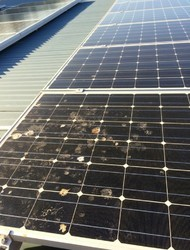

In [8]:
from PIL import Image
img = Image.open('C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project5/Project5_Code/Defect_Detection_on_Solar_Panel_using_ DL/dataset/1_imported_dataset/Bird-Drop/Bird (1).jpeg')
img

In [67]:
img.format

'JPEG'

In [68]:
img.mode

'RGB'

In [69]:
img.width , img.height

(190, 250)

In [9]:
import matplotlib.pyplot as plt
img = plt.imread('C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project5/Project5_Code/Defect_Detection_on_Solar_Panel_using_ DL/dataset/1_imported_dataset/Bird-Drop/Bird (1).jpeg')

img

array([[[ 92, 112, 139],
        [ 77,  97, 124],
        [ 71,  92, 121],
        ...,
        [170, 204, 231],
        [166, 200, 227],
        [156, 190, 217]],

       [[ 73,  94, 123],
        [ 70,  91, 120],
        [ 71,  92, 123],
        ...,
        [168, 200, 225],
        [166, 198, 223],
        [156, 190, 215]],

       [[ 70,  93, 125],
        [ 70,  95, 126],
        [ 68,  92, 126],
        ...,
        [165, 195, 219],
        [170, 200, 224],
        [171, 203, 226]],

       ...,

       [[118, 105,  96],
        [114, 102,  90],
        [144, 132, 120],
        ...,
        [ 38,  34,  35],
        [ 42,  38,  37],
        [ 41,  37,  36]],

       [[ 86,  73,  65],
        [ 66,  53,  44],
        [ 82,  68,  57],
        ...,
        [ 41,  37,  36],
        [ 45,  41,  40],
        [ 37,  33,  32]],

       [[ 80,  67,  59],
        [ 79,  66,  57],
        [ 75,  61,  52],
        ...,
        [ 42,  38,  37],
        [ 45,  41,  40],
        [ 36,  32,  31]]

we got colored image, and we got 3D values.

In tensor flow, we have an option to download the images from directory.

we are splitting the train images and test images.

**Splitting Train and Test Images**

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2 #20% -> is from Testing and 80% is for Training
)

train_images = datagen.flow_from_directory( #flow_from_directory -> data will read thru ImageDatagenerator, rescaling will happen (but already we have done rescaling), then we will get images. those images will be in targeted size. no need to provide seed (bcoz by default it will be present)
    dir_path,
    target_size=(500,500), #Resize each image to 500x500
    batch_size = 30,
    class_mode = "categorical",
    subset="training" #Training # ← gets 80%
)

test_images = datagen.flow_from_directory(
    dir_path,
    target_size=(500,500),
    batch_size = 30,
    class_mode = "categorical", #The labels are one-hot encoded for classes
    subset="validation" #Testing/Validation #Gets 20% for Testing
)

Found 698 images belonging to 6 classes.
Found 171 images belonging to 6 classes.


**Verifying Number of training images & testing images**

In [74]:
print("Number of training images:", train_images.samples)
print("Number of testing images:", test_images.samples)

# Total number of classes
print("Number of classes:", train_images.num_classes)

# Class indices (dictionary: class name -> class index)
print("\nClass mapping:", train_images.class_indices)



# Distribution of images per class in training set
from collections import Counter
print("\nTraining distribution:", Counter(train_images.classes))

# Same for test set
print("Testing distribution:", Counter(test_images.classes))


Number of training images: 698
Number of testing images: 171
Number of classes: 6

Class mapping: {'Bird-Drop': 0, 'Clean': 1, 'Dusty': 2, 'Electrical-Damage': 3, 'Physical-Damage': 4, 'Snow-Covered': 5}

Training distribution: Counter({np.int32(1): 155, np.int32(0): 153, np.int32(2): 152, np.int32(5): 99, np.int32(3): 83, np.int32(4): 56})
Testing distribution: Counter({np.int32(0): 38, np.int32(1): 38, np.int32(2): 38, np.int32(5): 24, np.int32(3): 20, np.int32(4): 13})


In [72]:
train_images

In [73]:
train_images[0]

(array([[[[0.9450981 , 0.9686275 , 0.9686275 ],
          [0.90196085, 0.92549026, 0.92549026],
          [0.8980393 , 0.9294118 , 0.93725497],
          ...,
          [0.45098042, 0.49803925, 0.5921569 ],
          [0.3921569 , 0.454902  , 0.58431375],
          [0.36078432, 0.42352945, 0.5568628 ]],
 
         [[0.8941177 , 0.9176471 , 0.9176471 ],
          [0.90196085, 0.92549026, 0.92549026],
          [0.86274517, 0.8941177 , 0.90196085],
          ...,
          [0.47058827, 0.5254902 , 0.6313726 ],
          [0.37254903, 0.43529415, 0.5647059 ],
          [0.3254902 , 0.38823533, 0.52156866]],
 
         [[0.9215687 , 0.9450981 , 0.9450981 ],
          [0.882353  , 0.9058824 , 0.9058824 ],
          [0.8588236 , 0.89019614, 0.8980393 ],
          ...,
          [0.44705886, 0.50980395, 0.6117647 ],
          [0.40000004, 0.46274513, 0.5921569 ],
          [0.3921569 , 0.454902  , 0.5882353 ]],
 
         ...,
 
         [[0.2392157 , 0.30980393, 0.45098042],
          [0.14117

In [74]:
test_images

In [75]:
test_images[0]

(array([[[[0.3019608 , 0.30588236, 0.23529413],
          [0.28235295, 0.28627452, 0.22352943],
          [0.29803923, 0.3019608 , 0.24705884],
          ...,
          [0.4156863 , 0.4156863 , 0.42352945],
          [0.38823533, 0.38823533, 0.39607847],
          [0.4039216 , 0.4039216 , 0.41176474]],
 
         [[0.50980395, 0.52156866, 0.454902  ],
          [0.31764707, 0.32941177, 0.2627451 ],
          [0.19215688, 0.20000002, 0.14509805],
          ...,
          [0.36862746, 0.36862746, 0.37647063],
          [0.29803923, 0.29803923, 0.30588236],
          [0.25490198, 0.25490198, 0.2627451 ]],
 
         [[0.31764707, 0.32941177, 0.2627451 ],
          [0.26666668, 0.2784314 , 0.21176472],
          [0.1254902 , 0.13333334, 0.07843138],
          ...,
          [0.2784314 , 0.2784314 , 0.28627452],
          [0.38431376, 0.38431376, 0.3921569 ],
          [0.5647059 , 0.5647059 , 0.57254905]],
 
         ...,
 
         [[0.34509805, 0.41176474, 0.5294118 ],
          [0.33333

In [ ]:
images,labels = next(train_images) #Next -> It doesn’t load all data into memory — great for efficient training on large datasets

In [77]:
images

array([[[[0.9960785 , 0.98823535, 0.8352942 ],
         [0.9921569 , 0.9843138 , 0.8313726 ],
         [0.9960785 , 0.98823535, 0.8352942 ],
         ...,
         [0.8117648 , 0.8000001 , 0.7803922 ],
         [0.8000001 , 0.78823537, 0.7686275 ],
         [0.80392164, 0.79215693, 0.7725491 ]],

        [[0.9607844 , 0.95294124, 0.8000001 ],
         [1.        , 1.        , 0.854902  ],
         [1.        , 0.9921569 , 0.83921576],
         ...,
         [0.81568635, 0.8000001 , 0.78823537],
         [0.8117648 , 0.7960785 , 0.7843138 ],
         [0.81568635, 0.8000001 , 0.78823537]],

        [[0.9607844 , 0.95294124, 0.8000001 ],
         [1.        , 0.9960785 , 0.8431373 ],
         [0.95294124, 0.9450981 , 0.79215693],
         ...,
         [0.8078432 , 0.80392164, 0.78823537],
         [0.8117648 , 0.8078432 , 0.79215693],
         [0.81568635, 0.8117648 , 0.7960785 ]],

        ...,

        [[0.3019608 , 0.3803922 , 0.40784317],
         [0.26666668, 0.34509805, 0.37254903]

In [78]:
labels

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=flo

In [12]:
np.argmax(labels[0]) #will get the value of the class name

np.int64(0)

**Verifying the sample images from each class**

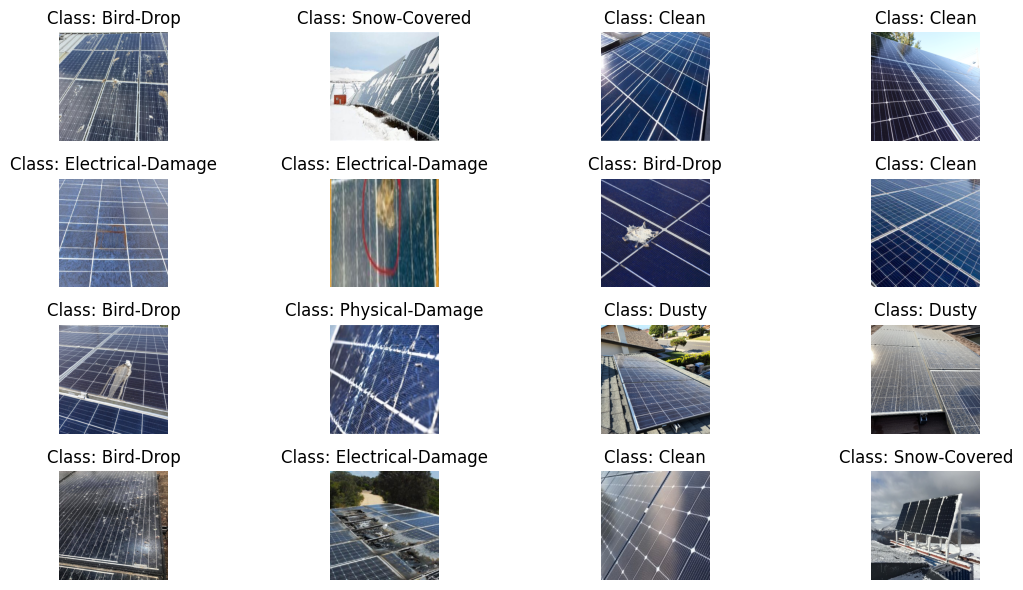

In [13]:
import numpy as np
import matplotlib.pyplot as plt 

# class_name = ['Clean', 'Dusty', 'Bird-Drop', 'Electrical-Damage', 'Physical-Damage', 'Snow-Covered']

class_name = ['Bird-Drop',
 'Clean',
 'Dusty',
 'Electrical-Damage',
 'Physical-Damage',
 'Snow-Covered']

images, labels = next(train_images)

plt.figure(figsize=(12, 6))  # w,h

for i in range(0,16):
    plt.subplot(4, 4, i+1)  # 2 rows, 3 columns
    plt.imshow(images[i])
    class_lab = class_name[np.argmax(labels[i])]
    plt.title(f"Class: {class_lab}")
    plt.axis("off")

plt.tight_layout()
plt.show()


**CNN for Solar Panel Defect Classification - Sequential model:**

In [14]:
### **CNN for Solar Panel Defect Classification - Sequential model:**

from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(500,500,3))) #We have imported in 500 x 500
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(30,activation='relu')) #hidden layer
model.add(Dense(6,activation='softmax')) #o/p is 10 , bcoz we have 10 classes


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


result = model.fit(train_images,epochs=10,validation_data=(test_images))

c:\Users\dhars\Downloads\Dhass\codeing\GUVI\2. MainBoot\4.Project_Code\Project5\Project5_Code\Defect_Detection_on_Solar_Panel_using_ DL\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\dhars\Downloads\Dhass\codeing\GUVI\2. MainBoot\4.Project_Code\Project5\Project5_Code\Defect_Detection_on_Solar_Panel_using_ DL\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.2027 - loss: 2.0786 - val_accuracy: 0.3392 - val_loss: 0.4381
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.3573 - loss: 0.4194 - val_accuracy: 0.3450 - val_loss: 0.4326
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.5390 - loss: 0.3626 - val_accuracy: 0.4737 - val_loss: 0.3851
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6226 - loss: 0.2852 - val_accuracy: 0.4269 - val_loss: 0.3739
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7169 - loss: 0.2489 - val_accuracy: 0.5380 - val_loss: 0.3497
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.8187 - loss: 0.1616 - val_accuracy: 0.5556 - val_loss: 0.3686
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9240 - loss: 0.1188 - val_accuracy: 0.5497 - val_loss: 0.3435
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9518 - loss: 0.1007 - val_accuracy: 0.5965 - val_loss:

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 498, 498, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 249, 249, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 247, 247, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 123, 123, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 968256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │    29,047,710 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           186 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,201,866 (332.65 MB)

 Trainable params: 29,067,288 (110.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 58,134,578 (221.77 MB)

In [19]:
result.history

{'accuracy': [0.24068768322467804,
  0.3567335307598114,
  0.5544412732124329,
  0.6189111471176147,
  0.7234957218170166,
  0.8166189193725586,
  0.9183381199836731,
  0.9555873870849609,
  0.972779393196106,
  0.984240710735321],
 'loss': [1.2152469158172607,
  0.415707528591156,
  0.35385045409202576,
  0.29404890537261963,
  0.2312791645526886,
  0.15945208072662354,
  0.11916075646877289,
  0.08974893391132355,
  0.06919228285551071,
  0.05877586081624031],
 'val_accuracy': [0.3391812741756439,
  0.34502923488616943,
  0.4736842215061188,
  0.42690059542655945,
  0.5380116701126099,
  0.5555555820465088,
  0.5497075915336609,
  0.5964912176132202,
  0.5614035129547119,
  0.5380116701126099],
 'val_loss': [0.4381314516067505,
  0.4326389729976654,
  0.38505131006240845,
  0.373921275138855,
  0.3497026860713959,
  0.3686383068561554,
  0.34346437454223633,
  0.40539810061454773,
  0.4626096189022064,
  0.44598495960235596]}

**Accuracy vs loss for Sequential Model**

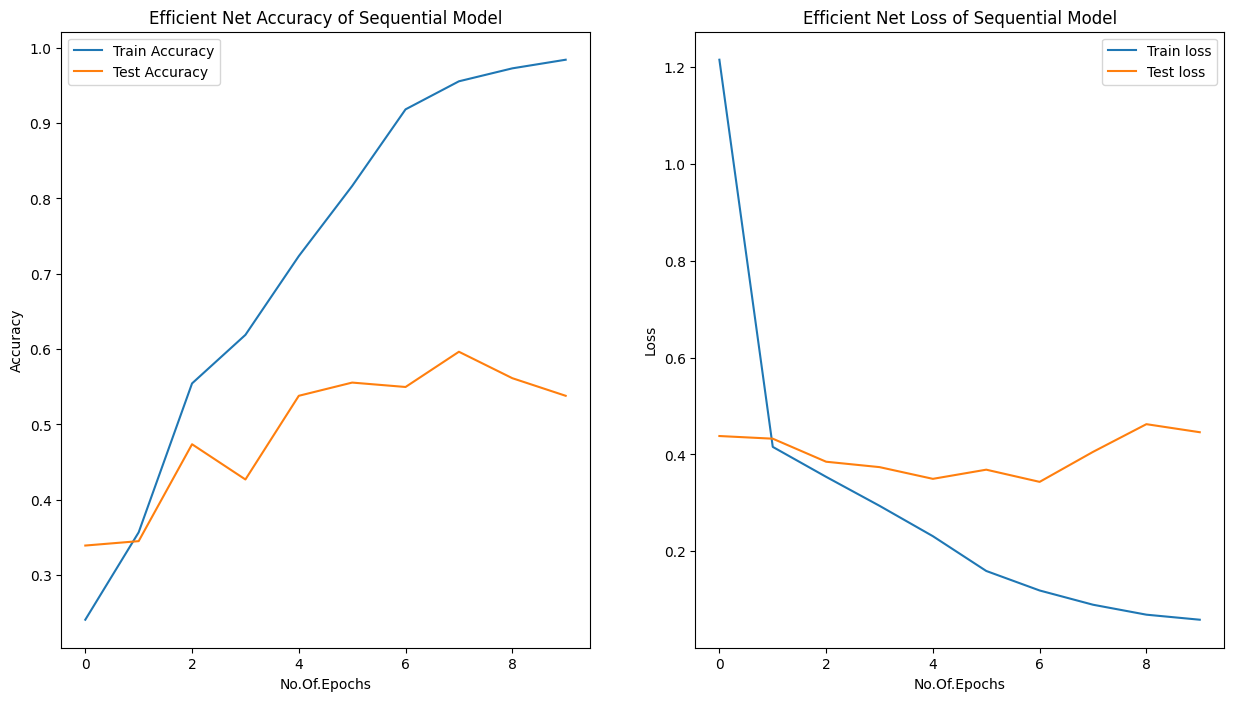

In [47]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1) #row 1, 2 column , column 1
plt.plot(result.history['accuracy'] , label='Train Accuracy')
plt.plot(result.history['val_accuracy'] , label='Test Accuracy')
plt.xlabel('No.Of.Epochs')
plt.ylabel("Accuracy")
plt.title("Efficient Net Accuracy of Sequential Model")
plt.legend()

plt.subplot(1,2,2)  #row 1, 2 column, column 2
plt.plot(result.history['loss'] , label='Train loss')
plt.plot(result.history['val_loss'] , label='Test loss')
plt.xlabel('No.Of.Epochs')
plt.ylabel("Loss")
plt.title("Efficient Net Loss of Sequential Model")
plt.legend()

plt.show()

In [26]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
### **keras - plot model**

from tensorflow.keras.utils import plot_model

plot_model(
    model,
    to_file='CNN_Sequential_model.png',             # Output file
    show_shapes=True,                   # Show shape of layers
    show_layer_names=True,              # Show names of layers
    show_layer_activations=True,        # Show activation functions
    expand_nested=True,                 # Expand nested models (like Functional inside Sequential)
    show_trainable=True                 # Highlight trainable layers
)


**Saving the Model**

In [45]:
model.save("model/solar_panel_detection_sequential_model.keras")

In [ ]:
model.save("model/solar_panel_detection_sequential_model.h5")

**Predict the model**

In [24]:
y_predicted = model.predict(test_images)
y_predicted

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 705ms/step


array([[4.2871181e-03, 1.4126325e-06, 9.9052739e-01, 6.0162891e-04,
        4.5545329e-03, 2.7957842e-05],
       [9.9988151e-01, 3.0172557e-06, 1.1076071e-06, 9.1160575e-05,
        9.2805375e-13, 2.3286450e-05],
       [1.3947132e-01, 1.0193530e-04, 8.4214091e-01, 1.4792820e-02,
        2.5675753e-03, 9.2540256e-04],
       ...,
       [5.5258954e-03, 7.0360977e-05, 9.5063137e-07, 9.9096769e-01,
        2.2973162e-03, 1.1377367e-03],
       [5.2009193e-09, 1.0962696e-08, 6.3160561e-09, 2.5500794e-08,
        9.9997902e-01, 2.0914813e-05],
       [4.5639059e-08, 1.0000000e+00, 2.9163553e-13, 4.5338528e-11,
        6.9516510e-17, 1.4272219e-08]], dtype=float32)

In [28]:
np.argmax(y_predicted[0])

np.int64(2)

In [29]:
import numpy as np

predictions = np.argmax(y_predicted, axis=1)
predictions

array([2, 0, 2, 2, 0, 0, 5, 0, 2, 3, 5, 0, 5, 0, 0, 5, 0, 5, 0, 2, 5, 2,
       0, 2, 0, 0, 0, 0, 0, 5, 2, 4, 0, 5, 0, 4, 2, 0, 1, 1, 0, 2, 5, 3,
       3, 2, 1, 2, 5, 1, 2, 0, 2, 2, 0, 2, 3, 0, 1, 0, 0, 2, 4, 1, 5, 4,
       3, 2, 5, 1, 5, 0, 0, 1, 1, 4, 0, 5, 5, 4, 2, 0, 5, 3, 3, 0, 0, 3,
       0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 4, 2, 0, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 2, 0, 2, 0, 3, 0, 5, 1, 2, 1, 5, 0, 0, 0, 0, 0, 5, 0, 0,
       0, 5, 5, 3, 0, 0, 2, 0, 0, 0, 2, 0, 0, 5, 5, 5, 0, 0, 0, 5, 0, 5,
       0, 5, 0, 5, 5, 1, 0, 3, 4, 1, 0, 3, 4, 3, 3, 4, 1])

In [32]:
labels = list(test_images.class_indices.keys())
labels

['Bird-Drop',
 'Clean',
 'Dusty',
 'Electrical-Damage',
 'Physical-Damage',
 'Snow-Covered']

In [35]:
true_labels = test_images.classes
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int32)

**confusion_matrix**

In [36]:
from sklearn.metrics import  confusion_matrix

cm = confusion_matrix(true_labels, predictions)
cm

array([[18,  0,  9,  1,  2,  8],
       [ 8,  9,  9,  4,  3,  5],
       [18,  3,  9,  3,  2,  3],
       [11,  2,  2,  1,  0,  4],
       [ 7,  0,  2,  1,  0,  3],
       [ 8,  3,  0,  4,  3,  6]])

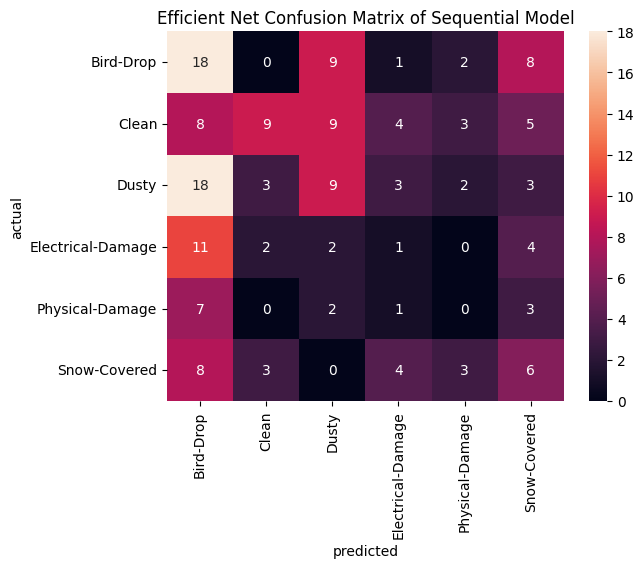

In [46]:
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns

sns.heatmap(cm,annot=True,fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title("Efficient Net Confusion Matrix of Sequential Model")
plt.show()

**classification_report**

In [41]:
print(classification_report(true_labels, predictions, target_names=labels))

                   precision    recall  f1-score   support

        Bird-Drop       0.26      0.47      0.33        38
            Clean       0.53      0.24      0.33        38
            Dusty       0.29      0.24      0.26        38
Electrical-Damage       0.07      0.05      0.06        20
  Physical-Damage       0.00      0.00      0.00        13
     Snow-Covered       0.21      0.25      0.23        24

         accuracy                           0.25       171
        macro avg       0.23      0.21      0.20       171
     weighted avg       0.28      0.25      0.24       171



**MobileNetV2-based Classification Model (Keras)**

In [42]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

In [ ]:
# Define input shape (adapt if needed)
input_shape = (500, 500, 3) #img- size, im-size, RBG 

# Load MobileNetV2 base model without the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers
base_model.trainable = False

# Create custom head
inputs = Input(shape=input_shape)
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

outputs = Dense(6, activation='softmax')(x)  # 6 classes -> o/p

# Define the final model
model1 = Model(inputs, outputs)

# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])


result1 = model1.fit(train_images,epochs=10,validation_data=(test_images))

C:\Users\dhars\AppData\Local\Temp\ipykernel_8024\1197226269.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.3058 - loss: 3.0537 - val_accuracy: 0.6023 - val_loss: 1.1030
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5884 - loss: 1.0817 - val_accuracy: 0.7427 - val_loss: 0.7967
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.7179 - loss: 0.8224 - val_accuracy: 0.7544 - val_loss: 0.6689
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.7772 - loss: 0.6978 - val_accuracy: 0.7778 - val_loss: 0.6288
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7863 - loss: 0.6079 - val_accuracy: 0.7310 - val_loss: 0.7767
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7652 - loss: 0.6352 - val_accuracy: 0.8012 - val_loss: 0.5925
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.8122 - loss: 0.5169 - val_accuracy: 0.7778 - val_loss: 0.5810
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7981 - loss: 0.4790 - val_accuracy: 0.7661 - val_loss:

In [54]:
# Summary
model1.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 500, 500, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 16, 16, 1280)   │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,752,212 (10.50 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 329,486 (1.26 MB)

In [55]:
result1.history

{'accuracy': [0.3868194818496704,
  0.6002865433692932,
  0.7106017470359802,
  0.769340991973877,
  0.7722063064575195,
  0.7722063064575195,
  0.7893982529640198,
  0.8022922873497009,
  0.8266475796699524,
  0.8309455513954163],
 'loss': [2.233327865600586,
  1.048760175704956,
  0.8143535852432251,
  0.6896709203720093,
  0.6286469101905823,
  0.6146619319915771,
  0.5580851435661316,
  0.49432483315467834,
  0.47473442554473877,
  0.4470028579235077],
 'val_accuracy': [0.6023392081260681,
  0.7426900863647461,
  0.7543859481811523,
  0.7777777910232544,
  0.7309941649436951,
  0.8011695742607117,
  0.7777777910232544,
  0.7660818696022034,
  0.8421052694320679,
  0.7836257219314575],
 'val_loss': [1.1030082702636719,
  0.7967230081558228,
  0.6688573956489563,
  0.6287730932235718,
  0.7767276763916016,
  0.5925140380859375,
  0.5810004472732544,
  0.7229725122451782,
  0.5861282348632812,
  0.6128698587417603]}

**Accuracy vs loss for MobileNetV2_model**

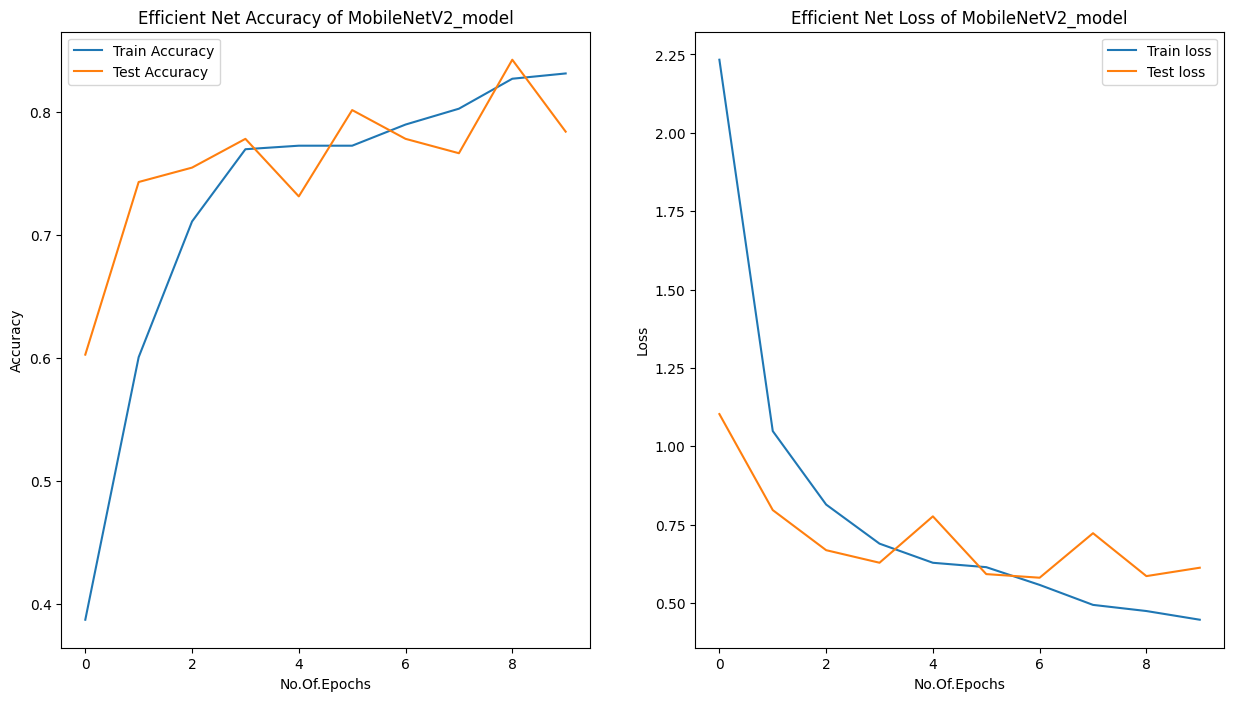

In [56]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1) #row 1, 2 column , column 1
plt.plot(result1.history['accuracy'] , label='Train Accuracy')
plt.plot(result1.history['val_accuracy'] , label='Test Accuracy')
plt.xlabel('No.Of.Epochs')
plt.ylabel("Accuracy")
plt.title("Efficient Net Accuracy of MobileNetV2_model")
plt.legend()

plt.subplot(1,2,2)  #row 1, 2 column, column 2
plt.plot(result1.history['loss'] , label='Train loss')
plt.plot(result1.history['val_loss'] , label='Test loss')
plt.xlabel('No.Of.Epochs')
plt.ylabel("Loss")
plt.title("Efficient Net Loss of MobileNetV2_model")
plt.legend()

plt.show()

In [57]:
### **keras - plot model**

from tensorflow.keras.utils import plot_model

plot_model(
    model1,
    to_file='CNN_MobileNetV2_model.png', # Output file- convolution-neural-network
    show_shapes=True,                   # Show shape of layers
    show_layer_names=True,              # Show names of layers
    show_layer_activations=True,        # Show activation functions
    expand_nested=True,                 # Expand nested models (like Functional inside Sequential)
    show_trainable=True                 # Highlight trainable layers
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


**Saving the MobileNetV2_model**

In [59]:
model1.save("model/solar_panel_detection_MobileNetV2_model.keras")

In [ ]:
model1.save("model/solar_panel_detection_MobileNetV2_model.h5")


**prediction for MobileNetV2_model**

In [60]:
y_predicted1 = model1.predict(test_images)
y_predicted1

6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


array([[1.3492960e-03, 5.0858217e-03, 6.9955297e-02, 9.9055040e-05,
        8.7148622e-03, 9.1479558e-01],
       [1.7409679e-02, 3.1760585e-04, 9.8096633e-01, 1.2559423e-03,
        4.3414031e-05, 7.0541582e-06],
       [3.1248349e-01, 1.9173671e-02, 8.2714655e-02, 3.2673661e-02,
        5.4800755e-01, 4.9469839e-03],
       ...,
       [2.4693588e-07, 1.5920119e-05, 6.3626276e-04, 1.3215881e-08,
        9.9706776e-05, 9.9924785e-01],
       [5.1265658e-04, 1.4824606e-04, 9.9919826e-01, 4.1619187e-05,
        7.0608017e-05, 2.8631765e-05],
       [2.8473401e-04, 9.8823339e-01, 1.0608619e-02, 1.7018247e-05,
        8.4723090e-04, 9.0945678e-06]], dtype=float32)

In [61]:
np.argmax(y_predicted1[0])

np.int64(5)

In [62]:
import numpy as np

predictions1 = np.argmax(y_predicted1, axis=1)
predictions1

array([5, 2, 4, 0, 4, 1, 5, 3, 5, 3, 5, 2, 3, 2, 1, 5, 3, 4, 2, 1, 2, 0,
       5, 4, 2, 3, 4, 3, 2, 2, 2, 5, 4, 0, 5, 3, 1, 2, 2, 2, 3, 2, 2, 0,
       2, 4, 5, 2, 0, 2, 4, 2, 1, 2, 2, 0, 0, 4, 2, 5, 4, 1, 5, 1, 1, 2,
       5, 0, 3, 3, 4, 1, 2, 0, 2, 3, 2, 0, 5, 1, 5, 0, 2, 5, 1, 2, 0, 5,
       1, 0, 5, 2, 2, 5, 0, 2, 0, 2, 1, 3, 2, 2, 2, 0, 0, 5, 0, 2, 2, 2,
       1, 5, 1, 3, 5, 2, 2, 1, 2, 2, 1, 4, 1, 0, 3, 1, 0, 1, 2, 3, 1, 2,
       2, 4, 1, 2, 1, 5, 2, 5, 2, 2, 2, 2, 5, 2, 2, 1, 0, 2, 4, 1, 0, 2,
       1, 4, 4, 5, 0, 1, 1, 3, 2, 1, 5, 2, 0, 0, 5, 2, 1])

In [63]:
labels1 = list(test_images.class_indices.keys())
labels1

['Bird-Drop',
 'Clean',
 'Dusty',
 'Electrical-Damage',
 'Physical-Damage',
 'Snow-Covered']

In [64]:
true_labels1 = test_images.classes
true_labels1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int32)

In [65]:
cm1 = confusion_matrix(true_labels1, predictions1)
cm1

array([[ 3,  4, 10,  7,  6,  8],
       [ 6,  5, 14,  4,  5,  4],
       [ 9,  6, 13,  2,  0,  8],
       [ 2,  6,  7,  2,  2,  1],
       [ 0,  2,  8,  0,  0,  3],
       [ 5,  7,  5,  1,  3,  3]])

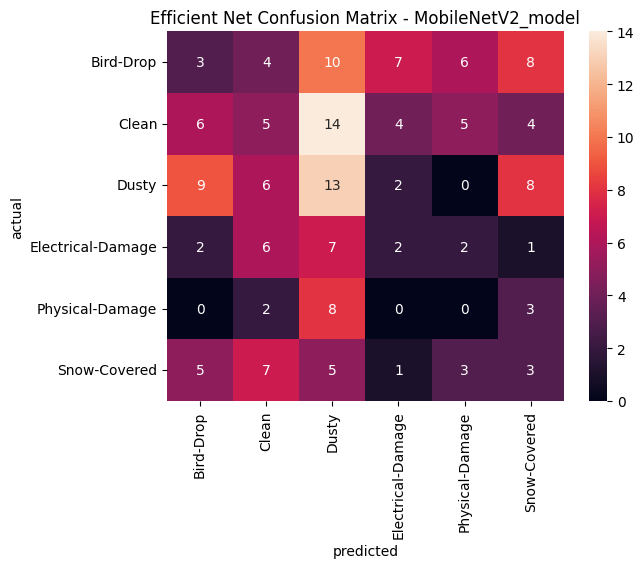

In [66]:
sns.heatmap(cm1,annot=True,fmt='d', xticklabels=labels1, yticklabels=labels1)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title("Efficient Net Confusion Matrix - MobileNetV2_model")
plt.show()

In [67]:
print(classification_report(true_labels1, predictions1, target_names=labels1))

                   precision    recall  f1-score   support

        Bird-Drop       0.12      0.08      0.10        38
            Clean       0.17      0.13      0.15        38
            Dusty       0.23      0.34      0.27        38
Electrical-Damage       0.12      0.10      0.11        20
  Physical-Damage       0.00      0.00      0.00        13
     Snow-Covered       0.11      0.12      0.12        24

         accuracy                           0.15       171
        macro avg       0.13      0.13      0.12       171
     weighted avg       0.14      0.15      0.14       171



**Sequential CNN metrics vs MobileNetV2 metrics:**

In [ ]:
# Sequential CNN metrics
sequential_cnn_acc = result.history['val_accuracy'][-1] #-1 ->It fetch the last result
sequential_cnn_loss = result.history['val_loss'][-1]
sequential_cnn_epochs = len(result.history['loss'])

# MobileNetV2 metrics
mobilenet_acc = result1.history['val_accuracy'][-1]
mobilenet_loss = result1.history['val_loss'][-1]
mobilenet_epochs = len(result1.history['loss'])

In [80]:
import pandas as pd

data = {
    "Metric": ["Validation Accuracy", "Validation Loss", "Epochs"],
    "MobileNetV2": [f"{mobilenet_acc:.2%}", f"{mobilenet_loss:.4f}", mobilenet_epochs],
    "Sequential CNN": [f"{sequential_cnn_acc:.2%}", f"{sequential_cnn_loss:.4f}", sequential_cnn_epochs]
}

df = pd.DataFrame(data)

# Show in console
print(df)


                Metric MobileNetV2 Sequential CNN
0  Validation Accuracy      78.36%         53.80%
1      Validation Loss      0.6129         0.4460
2               Epochs          10             10
